In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from flowField import *
from flowFieldWavy import *
import h5py
import numpy as np
import pdb
import cProfile
import time
from pseudo import *
from scipy.linalg import norm, svd
from scipy.sparse.linalg import gmres, LinearOperator
from scipy.optimize import newton_krylov,root,anderson
import exactRiblet as rib
import os
import resource

import matplotlib.pyplot as plt
%matplotlib inline

#figureFolder = "/home/sabarish/Dropbox/reports/2016/equilibria/figures/"
figureFolder = './figures/'
docFolder = "./doc/figures/"
#%run test_flowFieldWavy.py
resnormFun = lambda x: x.residuals().appendField(x.slice(nd=[0,1,2]).div()).norm()

In [3]:
rib.testExactRibletModule(L=4,M=8,epsArr=np.array([0.,0.]),complexType=np.complex)
rib.testExactRibletModule(complexType=np.complex)

sigma1 invariance norm of x is 2.47608646991e-16
Success for both tests!
sigma1 invariance norm of x is 2.47552219356e-16
Success for both tests!


(True, True)

# Plots for JFMrapids

## Residual norms, accuracy, energy density, bulk dissipation rate

In [3]:
#%%%%%%%%%%%%%%%%%%%%
# eps_1

#%%%%%%%%%%%%%%%%%%%%%%%%
loadPath='solutions/e1/'
nSol = 21 # Number of solutions
x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35) # Initial iterate: Sol for flat-walled Couette

# Scalars to be plotted:
resnormArr = np.zeros(nSol)   # Residual norm of converged solutions
accArr = np.zeros(nSol)       # Accuracy of solutions w.r.t grid size
distArr = np.zeros(nSol)      # Distance from x0
energyArr = np.zeros(nSol)    # Energy density
dissipationArr = np.zeros(nSol) # Bulk dissipation rate
pInputArr = np.zeros(nSol)      # 
initialnormArr = np.zeros(nSol)
epsArr = np.zeros(nSol)

resnormArr[0] = resnormFun(x0.slice(M=16,N=30))
accArr[0]  = resnormFun(x0.slice(L=14,M=20,N=60))
distArr[0] = 0.
energyArr[0] = x0.energy(); dissipationArr[0] = x0.dissipation(); pInputArr[0] = x0.powerInput()
initialnormArr[0] = resnormArr[0]
for k in range(1,nSol):
    solPath = loadPath+'A%02d/'%(k)
    solName = 'ribEq1L7M16N35E1_%03d.hdf5'%(5*k)
    x = loadh5(solPath+solName)
    epsArr[k] = x.flowDict['epsArr'][1]
    resnormArr[k] = resnormFun(x)
    accArr[k] = resnormFun(x.slice(L=14,M=32,N=70))
    distArr[k] = (x-x0).norm()
    
    energyArr[k] = x.energy()
    dissipationArr[k] = x.dissipation()
    pInputArr[k] = x.powerInput()
    
    x[:] = x0[:]
    initialnormArr[k] = resnormFun(x)
    

In [3]:
figureFolder = './figures/'
#%%%%%%%%%%%%%%%%%%%%
# eps_3

#%%%%%%%%%%%%%%%%%%%%%%%%
loadPath='solutions/'
nSol = 11 # Number of solutions
x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35) # Initial iterate: Sol for flat-walled Couette

# Scalars to be plotted:
resnormArr = np.zeros((3,nSol))   # Residual norm of converged solutions
accArr = np.zeros((3,nSol))       # Accuracy of solutions w.r.t grid size
distArr = np.zeros((3,nSol))      # Distance from x0
energyArr = np.zeros((3,nSol))    # Energy density
energyUArr = np.zeros((3,nSol))    # Energy density: streamwise
energyVWArr = np.zeros((3,nSol))    # Energy density: cross-stream
dissipationArr = np.zeros((3,nSol)) # Bulk dissipation rate
pInputArr = np.zeros((3,nSol))      # 
initialnormArr = np.zeros((3,nSol))
epsArr = np.zeros((3,nSol))

resnormArr[:,0] = resnormFun(x0.slice(M=16,N=30))
accArr[:,0]  = resnormFun(x0.slice(L=14,M=20,N=60))
distArr[:,0] = 0.
energyArr[:,0] = x0.energy(); dissipationArr[:,0] = x0.dissipation(); pInputArr[:,0] = x0.powerInput()
energyUArr[:,0] = x0.getScalar().energy(); energyVWArr[:,0] = x0.slice(nd=[0,1,2]).energy();
#initialnormArr[:,0] = resnormArr[0]
for k in range(1,nSol):
    # eps_1
    solPath = loadPath+'e1/'+ 'A%02d/'%(k)
    solName = 'ribEq1L7M16N35E1_%03d.hdf5'%(5*k)
    x = loadh5(solPath+solName)
    epsArr[0,k] = x.flowDict['epsArr'][1]
    resnormArr[0,k] = resnormFun(x)
    accArr[0,k] = resnormFun(x.slice(L=14,M=32,N=70))
    distArr[0,k] = (x-x0).norm()
    
    energyArr[0,k] = x.energy()
    energyUArr[0,k] = x.getScalar().energy()
    energyVWArr[0,k] = x.slice(nd=[1,2]).energy()
    dissipationArr[0,k] = x.dissipation()
    pInputArr[0,k] = x.powerInput()
    
    x[:] = x0[:]
    initialnormArr[0,k] = resnormFun(x)
    
    # eps_2
    solPath = loadPath+'e2/'+ 'A%02d/'%(k)
    solName = 'ribEq1L7M16N35E1_001E2_%03d.hdf5'%(5*k)
    x = loadh5(solPath+solName)
    epsArr[1,k] = x.flowDict['epsArr'][2]
    resnormArr[1,k] = resnormFun(x)
    accArr[1,k] = resnormFun(x.slice(L=14,M=32,N=70))
    distArr[1,k] = (x-x0).norm()
    
    energyArr[1,k] = x.energy()
    energyUArr[1,k] = x.getScalar().energy()
    energyVWArr[2,k] = x.slice(nd=[1,2]).energy()
    dissipationArr[1,k] = x.dissipation()
    pInputArr[1,k] = x.powerInput()
    
    x[:] = x0[:]
    initialnormArr[1,k] = resnormFun(x)

    # eps_3
    solPath = loadPath+'e3/'+ 'A%02d/'%(k)
    solName = 'ribEq1L7M16N35E1_001E2_000E3_%03d.hdf5'%(5*k)
    x = loadh5(solPath+solName)
    epsArr[2,k] = x.flowDict['epsArr'][3]
    resnormArr[2,k] = resnormFun(x)
    accArr[2,k] = resnormFun(x.slice(L=14,M=32,N=70))
    distArr[2,k] = (x-x0).norm()
    
    energyArr[2,k] = x.energy()
    energyUArr[2,k] = x.getScalar().energy()
    energyVWArr[2,k] = x.slice(nd=[1,2]).energy()
    dissipationArr[2,k] = x.dissipation()
    pInputArr[2,k] = x.powerInput()
    
    x[:] = x0[:]
    initialnormArr[2,k] = resnormFun(x)
    


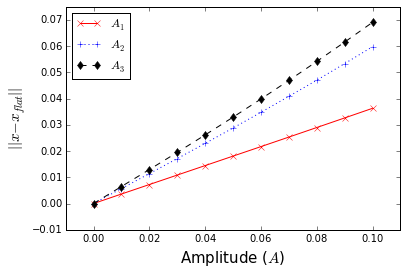

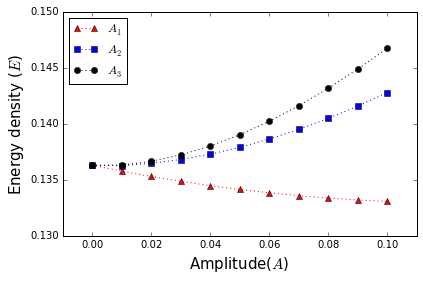

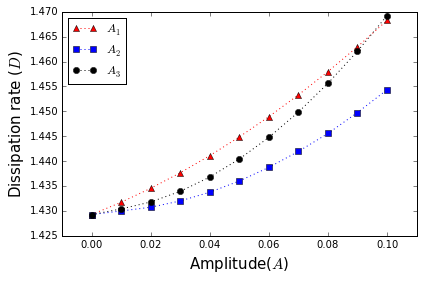

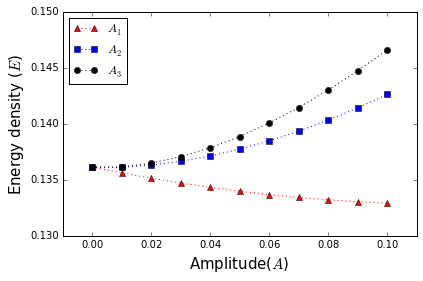

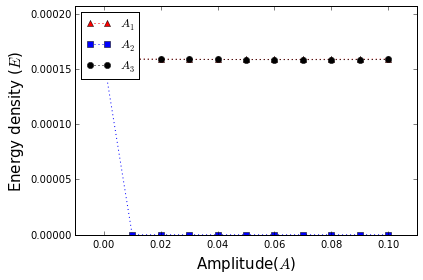

In [11]:
energyUArr[:,0] = x0.getScalar().energy(); energyVWArr[:,0] = x0.slice(nd=[1,2]).energy();

# Residual norm, accuracy, and distance
plt.figure()
plt.plot(2.*epsArr[0], distArr[0],'rx-')
plt.plot(2.*epsArr[1], distArr[1],'b+:')
plt.plot(2.*epsArr[2], distArr[2],'kd--')
plt.legend(['$A_1$', '$A_2$', '$A_3$'], loc=2)
plt.xlabel('Amplitude ($A$)',fontsize=15); plt.ylabel('$||x-x_{flat}||$', fontsize=15)
plt.ylim([-0.01,0.075]); plt.xlim([-0.01,0.11])
plt.savefig(figureFolder+'normDistE123.eps',format='eps',dpi=1200)
plt.show()

# Energy density and bulk dissipation rate
plt.figure()
plt.plot(2.*epsArr[0], energyArr[0],'r^:',label='$A_1$')
plt.plot(2.*epsArr[1], energyArr[1],'bs:',label='$A_2$')
plt.plot(2.*epsArr[2], energyArr[2],'ko:',label='$A_3$')
plt.xlim([-0.01,0.11])
plt.ylim([0.13,0.15])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('Energy density ($E$)',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'energyE123.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr[0], dissipationArr[0],'r^:',label='$A_1$')
plt.plot(2.*epsArr[1], dissipationArr[1],'bs:',label='$A_2$')
plt.plot(2.*epsArr[2], dissipationArr[2],'ko:',label='$A_3$')
plt.xlim([-0.01,0.11])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('Dissipation rate ($D$)',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'dissipationE123.eps',format='eps',dpi=1200)
plt.show()

# Energy density and bulk dissipation rate
plt.figure()
plt.plot(2.*epsArr[0], energyUArr[0],'r^:',label='$A_1$')
plt.plot(2.*epsArr[1], energyUArr[1],'bs:',label='$A_2$')
plt.plot(2.*epsArr[2], energyUArr[2],'ko:',label='$A_3$')
plt.xlim([-0.01,0.11])
plt.ylim([0.13,0.15])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('Energy density ($E$)',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'energyUE123.eps',format='eps',dpi=1200)
plt.show()


# Energy density and bulk dissipation rate
tmpVar1 = np.amin(energyVWArr); tmpVar2 = np.amax(energyVWArr)
plt.figure()
plt.plot(2.*epsArr[0], energyVWArr[0],'r^:',label='$A_1$')
plt.plot(2.*epsArr[1], energyVWArr[1],'bs:',label='$A_2$')
plt.plot(2.*epsArr[2], energyVWArr[2],'ko:',label='$A_3$')
plt.xlim([-0.01,0.11])
plt.ylim([-tmpVar1,1.3*tmpVar2])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('Energy density ($E$)',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'energyVWE123.eps',format='eps',dpi=1200)
plt.show()



In [14]:
xeq1 = loadh5('ribEq1L7M10N30E0000.hdf5'); xeq2 = loadh5('ribEq2L7M16N35E1_000.hdf5')
xeq1.slice(nd=[0]).norm()**2, xeq2.slice(nd=[0]).norm()**2, xeq1.slice(nd=[1,2]).norm()**2, xeq2.slice(nd=[1,2]).norm()**2

(0.27227429155164118,
 0.15006116484649215,
 0.00031786475480632845,
 0.0060127106348530045)

## Phase-difference

In [4]:
#%%%%%%%%%%%%%%%
# eps_1, eps_2, eps_3
#%%%%%%%%%%%%%%%%
# eps_q = 0
x0 = loadh5('ribEq1L7M10N30E0000.hdf5')
x = x0
phaseArrZ = 2.*np.pi*np.arange(0.,1.001,0.025)

normArr = np.zeros(phaseArrZ.size)
for m in range(phaseArrZ.size):
    phiZ = phaseArrZ[m]
    normArr[m] = resnormFun(x.shiftPhase(phiZ=phiZ))

normArrE1 = np.zeros(phaseArrZ.size)
x = loadh5('solutions/e1/A01/ribEq1L7M16N35E1_005.hdf5')
for m in range(phaseArrZ.size):
    phiZ = phaseArrZ[m]
    normArrE1[m] = resnormFun(x.shiftPhase(phiZ=phiZ))

normArrE2 = np.zeros(phaseArrZ.size)
x = loadh5('solutions/e2/A01/ribEq1L7M16N35E1_001E2_005.hdf5')
for m in range(phaseArrZ.size):
    phiZ = phaseArrZ[m]
    normArrE2[m] = resnormFun(x.shiftPhase(phiZ=phiZ))

    
    
normArrE3 = np.zeros(phaseArrZ.size)
x = loadh5('solutions/e3/A01/ribEq1L7M16N35E1_001E2_000E3_005.hdf5')
for m in range(phaseArrZ.size):
    phiZ = phaseArrZ[m]
    normArrE3[m] = resnormFun(x.shiftPhase(phiZ=phiZ))
        


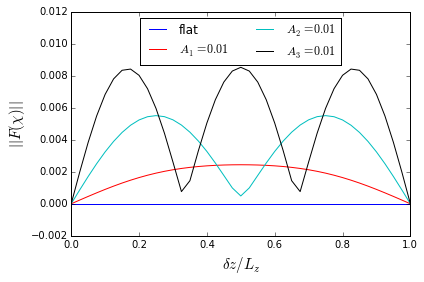

In [5]:
plt.plot(phaseArrZ/np.pi/2., normArr)
plt.plot(phaseArrZ/np.pi/2., normArrE1,'r')
plt.plot(phaseArrZ/np.pi/2., normArrE2,'c')
plt.plot(phaseArrZ/np.pi/2., normArrE3,'k')
#plt.ylim([-0.002,0.015])
plt.legend(['flat','$A_1=0.01$','$A_2=0.01$', '$A_3=0.01$'],ncol=2,loc='upper center')
plt.xlabel("$\delta z/L_z$",fontsize=15)
plt.ylabel("$||F(\\chi)||$",fontsize=15)
plt.ylim([-0.002,0.012])
plt.tight_layout()
plt.savefig(figureFolder+'phaseShiftE123.eps',format='eps',dpi=1200)
plt.show()

## Velocity plots

In [31]:
loadPath = 'solutions/e1/'
x0 = loadh5('ribEq1L7M10N30E0000.hdf5')
xList = [x0]
xList.append(loadh5(loadPath+'A01/ribEq1L7M16N35E1_005.hdf5'))
xList.append(loadh5(loadPath+'A05/ribEq1L7M16N35E1_025.hdf5'))
xList.append(loadh5(loadPath+'A10/ribEq1L7M16N35E1_050.hdf5'))
xList.append(loadh5(loadPath+'A15/ribEq1L7M16N35E1_075.hdf5'))
fNameList = ['A00','A01','A05','A10','A15']
for k in range(len(xList)):    
    x = xList[k]
    fName = fNameList[k]
    vf = x.slice(nd=[0,1,2])
    pf = x.getScalar(nd=3)
    fnorm = x.residuals().appendField(x.div()).norm()

    b = vf.flowDict['beta']; Lz = 2.*np.pi/b; eps = vf.flowDict['eps']; A = 2.*eps
    a = vf.flowDict['alpha']; Lx = 2.*np.pi/a
    zArr = np.arange(0., Lz*1.001,Lz/20.)
    yArr = vf.y
    xArr = np.array([0., Lx/4.,Lx/2.])

    u = vf.getScalar().getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    v = vf.getScalar(nd=1).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    w = vf.getScalar(nd=2).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))

    Y = vf.y.reshape((1,1,vf.N)) + np.zeros((xArr.size,1,1)) + A*np.cos(b*zArr.reshape((1,zArr.size,1)))
    Z = zArr.reshape((1,zArr.size,1)) + np.zeros(Y.shape)
    X = xArr.reshape((xArr.size,1,1)) + np.zeros(Y.shape)
    
    fName = 'velocityE1_'+fName
    
    if False:
        uLevels = 2.*np.arange(-0.5,0.501,0.025)
        plt.figure()
        plt.plot(Z[0,:,0], Y[0,:,0],'k')
        plt.plot(Z[0,:,-1], Y[0,:,-1],'k')
        plt.contourf(Z[0], Y[0], u[0], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
        plt.colorbar()
        plt.quiver(Z[0],Y[0], w[0],v[0],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
        print('Phase-shifted Eq1 at x0, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
        plt.tight_layout()

        #plt.savefig(figureFolder+'noLabels/'+fName+'x00.eps',format='eps')
        #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
        plt.savefig(figureFolder+fName+'x00.eps',format='eps')
        plt.show()

        plt.figure()
        plt.plot(Z[1,:,0], Y[1,:,0],'k')
        plt.plot(Z[1,:,-1], Y[1,:,-1],'k')
        plt.contourf(Z[1], Y[1], u[1], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
        plt.colorbar()
        plt.quiver(Z[1],Y[1], w[1],v[1],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
        print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
        plt.tight_layout()

        #plt.savefig(figureFolder+'noLabels/'+fName+'x25.eps',format='eps')
        #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
        plt.savefig(figureFolder+fName+'x25.eps',format='eps')
        plt.show()


        plt.figure()
        plt.plot(Z[2,:,0], Y[2,:,0],'k')
        plt.plot(Z[2,:,-1], Y[2,:,-1],'k')
        plt.contourf(Z[2], Y[2], u[2], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
        plt.colorbar()
        plt.quiver(Z[2],Y[2], w[2],v[2],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
        print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
        plt.tight_layout()

        #plt.savefig(figureFolder+'noLabels/'+fName+'x50.eps',format='eps')
        #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
        plt.savefig(figureFolder+fName+'x50.eps',format='eps')
        plt.show()


/usr/local/lib/python3.4/dist-packages/numpy-1.11.0-py3.4-linux-x86_64.egg/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


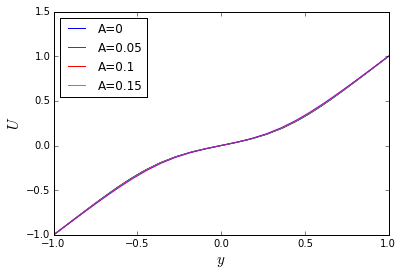

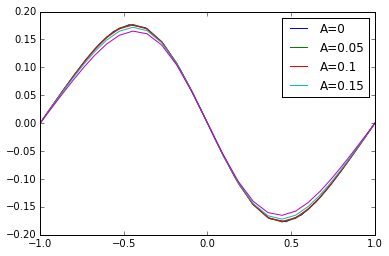

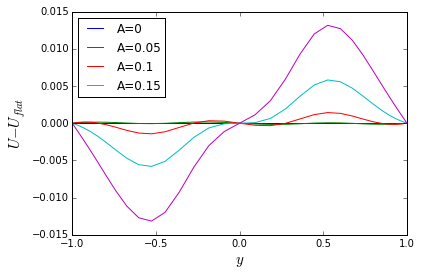

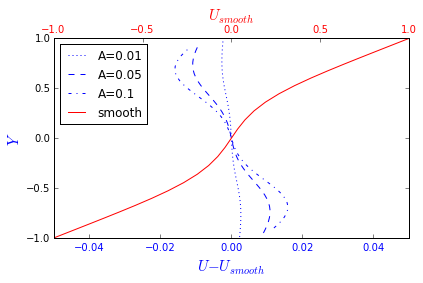

In [32]:
plt.figure()
for k in range(len(xList)):
    x = xList[k]
    plt.plot(x.y, x[0,x.nx//2,x.nz//2,0])
plt.legend(['A=0','A=0.05','A=0.1','A=0.15'],loc=2)
plt.xlabel('$y$',fontsize=15); plt.ylabel('$U$',fontsize=15)
plt.savefig(figureFolder+'UE1.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
for k in range(len(xList)):
    x = xList[k]
    plt.plot(x.y, x[0,x.nx//2,x.nz//2,0]-x.y)
plt.legend(['A=0','A=0.05','A=0.1','A=0.15'])
plt.show()

xList[0] = xList[0].slice(L=7,M=16,N=35)
x0 = xList[0]
plt.figure()
for k in range(len(xList)):
    x = xList[k]
    plt.plot(x.y, x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0])
plt.legend(['A=0','A=0.05','A=0.1','A=0.15'],loc=2)
plt.xlabel('$y$',fontsize=15); plt.ylabel('$U-U_{flat}$',fontsize=15)
plt.savefig(figureFolder+'U_UflatE1.eps',format='eps',dpi=1200)
plt.show()


# U_{00}
fig,ax1 = plt.subplots()
if False:
    x=xList[1]
    ln1 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b:',label='A=0.01')
    x=xList[2]
    ln2 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b--',label='A=0.05')
    x=xList[3]
    ln3 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b-.',label='A=0.1')

if True:
    vArr00 = x0[0,x0.nx//2, x0.nz//2,0]
    x=xList[1]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln1 = ax1.plot(vArr-vArr0, yArr ,'b:',label='A=0.01')
    x=xList[2]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln2 = ax1.plot(vArr-vArr0, yArr  ,'b--',label='A=0.05')
    x=xList[3]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln3 = ax1.plot(vArr-vArr0, yArr ,'b-.',label='A=0.1')

ax1.set_xlabel('$U-U_{smooth}$',color='b',fontsize=15)
ax1.set_ylabel('$Y$',color='b',fontsize=15)
ax1.set_xlim([-0.05,0.05])
ax1.set_ylim([-1.,1.0])

ax2 = ax1.twiny()
ln0 = ax2.plot(x0[0,x.nx//2,x.nz//2,0],x0.y ,'r',label='smooth')
ax2.set_xlim([-1.,1.])
ax2.set_ylim([-1.,1.])
ax2.set_xlabel('$U_{smooth}$',color='r',fontsize=15)

for tl in ax1.get_xticklabels():
    tl.set_color('b')
for tl in ax2.get_xticklabels():
    tl.set_color('r')

line1,label1 = ax1.get_legend_handles_labels()
line2,label2 = ax2.get_legend_handles_labels()
ax2.legend(line1+line2, label1+label2,loc=2)

plt.tight_layout()
plt.savefig(figureFolder+'U_UflatE1.eps',format='eps',dpi=1200)
plt.show()



Phase-shifted Eq1 at x0, with A=0, fnorm=6.41e-05


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


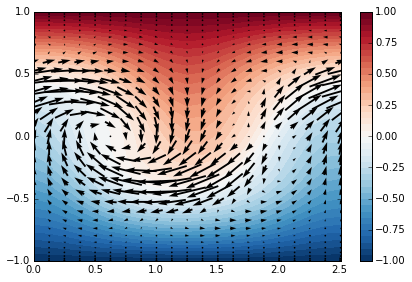

Phase-shifted Eq1 at x1, with A=0, fnorm=6.41e-05


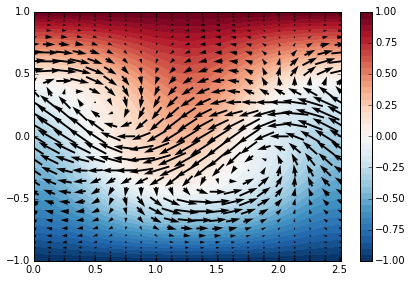

Phase-shifted Eq1 at x1, with A=0, fnorm=6.41e-05


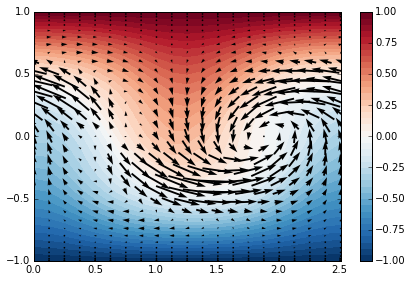

Phase-shifted Eq1 at x0, with A=0.01, fnorm=3.22e-08


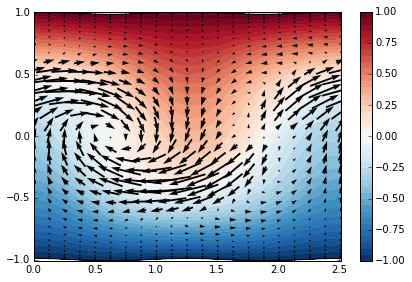

Phase-shifted Eq1 at x1, with A=0.01, fnorm=3.22e-08


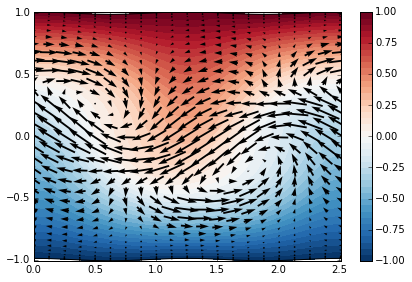

Phase-shifted Eq1 at x1, with A=0.01, fnorm=3.22e-08


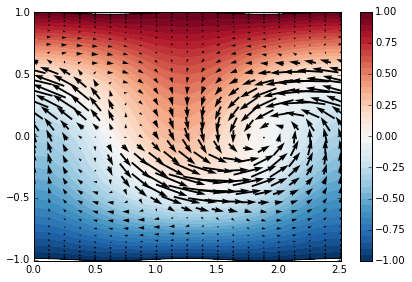

Phase-shifted Eq1 at x0, with A=0.02, fnorm=8.83e-06


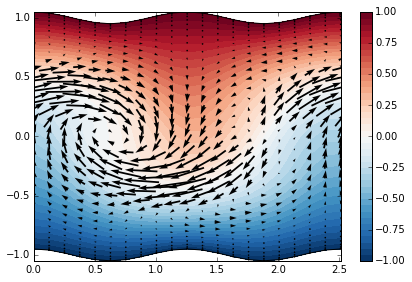

Phase-shifted Eq1 at x1, with A=0.02, fnorm=8.83e-06


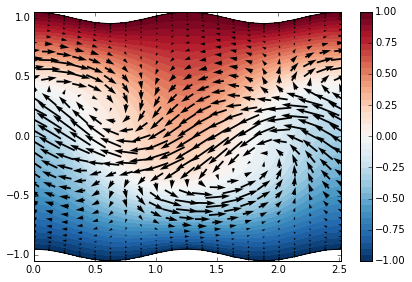

Phase-shifted Eq1 at x1, with A=0.02, fnorm=8.83e-06


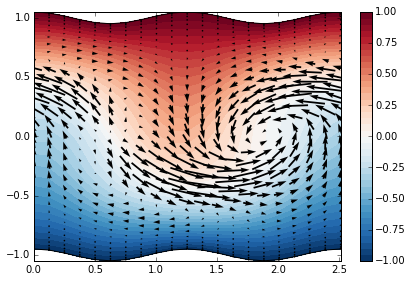

Phase-shifted Eq1 at x0, with A=0.03, fnorm=6.32e-05


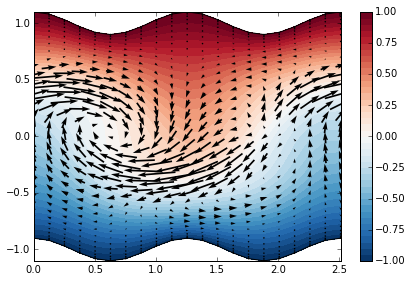

Phase-shifted Eq1 at x1, with A=0.03, fnorm=6.32e-05


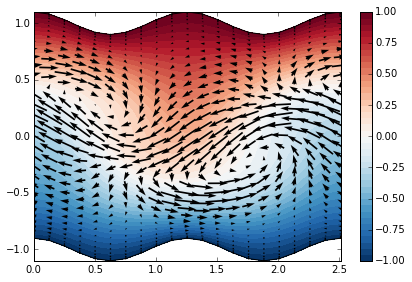

Phase-shifted Eq1 at x1, with A=0.03, fnorm=6.32e-05


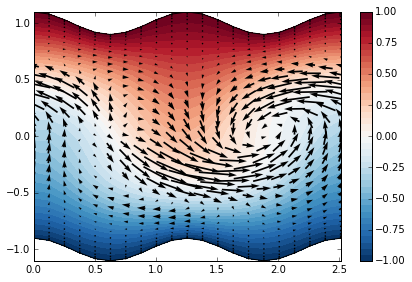

In [27]:
#%%%%%%%%%%%%%%%%%%%%%
# eps_2
#%%%%%%%%%%%%%%%%%%%%%%%
loadPath = 'solutions/e2/'
xList = [x0]
xList.append(loadh5(loadPath+'A01/ribEq1L7M16N35E1_001E2_005.hdf5'))
xList.append(loadh5(loadPath+'A05/ribEq1L7M16N35E1_001E2_025.hdf5'))
xList.append(loadh5(loadPath+'A10/ribEq1L7M16N35E1_001E2_050.hdf5'))
fNameList = ['A00','A01','A05','A10']
for k in range(len(xList)):    
    x = xList[k]
    fName = fNameList[k]
    vf = x.slice(nd=[0,1,2])
    pf = x.getScalar(nd=3)
    fnorm = x.residuals().appendField(x.div()).norm()

    b = vf.flowDict['beta']; Lz = 2.*np.pi/b; 
    if k > 0:
        eps = vf.flowDict['epsArr'][2]
    else: 
        eps = 0.
    A = 2.*eps
    a = vf.flowDict['alpha']; Lx = 2.*np.pi/a
    zArr = np.arange(0., Lz*1.001,Lz/20.)
    yArr = vf.y
    xArr = np.array([0., Lx/4.,Lx/2.])

    u = vf.getScalar().getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    v = vf.getScalar(nd=1).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    w = vf.getScalar(nd=2).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))

    Y = vf.y.reshape((1,1,vf.N)) + np.zeros((xArr.size,1,1)) + A*np.cos(2.*b*zArr.reshape((1,zArr.size,1)))
    Z = zArr.reshape((1,zArr.size,1)) + np.zeros(Y.shape)
    X = xArr.reshape((xArr.size,1,1)) + np.zeros(Y.shape)
    
    fName = 'velocityE2_'+fName

    uLevels = 2.*np.arange(-0.5,0.501,0.025)
    plt.figure()
    plt.plot(Z[0,:,0], Y[0,:,0],'k')
    plt.plot(Z[0,:,-1], Y[0,:,-1],'k')
    plt.contourf(Z[0], Y[0], u[0], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
    plt.colorbar()
    plt.quiver(Z[0],Y[0], w[0],v[0],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
    print('Phase-shifted Eq1 at x0, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
    plt.tight_layout()

    #plt.savefig(figureFolder+'noLabels/'+fName+'x00.eps',format='eps')
    #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
    plt.savefig(figureFolder+fName+'x00.eps',format='eps')
    plt.show()

    plt.figure()
    plt.plot(Z[1,:,0], Y[1,:,0],'k')
    plt.plot(Z[1,:,-1], Y[1,:,-1],'k')
    plt.contourf(Z[1], Y[1], u[1], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
    plt.colorbar()
    plt.quiver(Z[1],Y[1], w[1],v[1],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
    print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
    plt.tight_layout()

    #plt.savefig(figureFolder+'noLabels/'+fName+'x25.eps',format='eps')
    #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
    plt.savefig(figureFolder+fName+'x25.eps',format='eps')
    plt.show()


    plt.figure()
    plt.plot(Z[2,:,0], Y[2,:,0],'k')
    plt.plot(Z[2,:,-1], Y[2,:,-1],'k')
    plt.contourf(Z[2], Y[2], u[2], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
    plt.colorbar()
    plt.quiver(Z[2],Y[2], w[2],v[2],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
    print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
    plt.tight_layout()

    #plt.savefig(figureFolder+'noLabels/'+fName+'x50.eps',format='eps')
    #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
    plt.savefig(figureFolder+fName+'x50.eps',format='eps')
    plt.show()


/usr/local/lib/python3.4/dist-packages/numpy-1.11.0-py3.4-linux-x86_64.egg/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


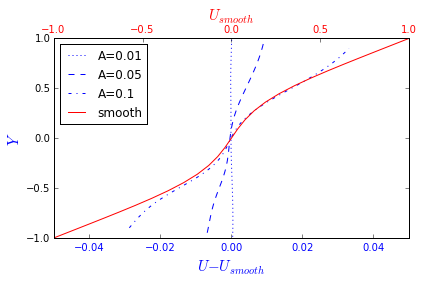

In [30]:
# U_{00}
fig,ax1 = plt.subplots()
if False:
    x=xList[1]
    ln1 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b:',label='A=0.01')
    x=xList[2]
    ln2 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b--',label='A=0.05')
    x=xList[3]
    ln3 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b-.',label='A=0.1')

if True:
    vArr00 = x0[0,x.nx//2, x.nz//2,0]
    x=xList[1]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln1 = ax1.plot(vArr-vArr0, yArr ,'b:',label='A=0.01')
    x=xList[2]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln2 = ax1.plot(vArr-vArr0, yArr  ,'b--',label='A=0.05')
    x=xList[3]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln3 = ax1.plot(vArr-vArr0, yArr ,'b-.',label='A=0.1')
ax1.set_xlabel('$U-U_{smooth}$',color='b',fontsize=15)
ax1.set_ylabel('$Y$',color='b',fontsize=15)
ax1.set_xlim([-0.05,0.05])
ax1.set_ylim([-1.,1.0])
#ax1.grid(True)

ax2 = ax1.twiny()
ln0 = ax2.plot(x0[0,x.nx//2,x.nz//2,0],x0.y ,'r',label='smooth')
ax2.set_xlim([-1.,1.])
ax2.set_ylim([-1.,1.])
ax2.set_xlabel('$U_{smooth}$',color='r',fontsize=15)

for tl in ax1.get_xticklabels():
    tl.set_color('b')
for tl in ax2.get_xticklabels():
    tl.set_color('r')

line1,label1 = ax1.get_legend_handles_labels()
line2,label2 = ax2.get_legend_handles_labels()
ax2.legend(line1+line2, label1+label2,loc=2)

plt.tight_layout()
plt.savefig(figureFolder+'U_UflatE2.eps',format='eps',dpi=1200)
plt.show()


Phase-shifted Eq1 at x0, with A=0, fnorm=6.41e-05


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


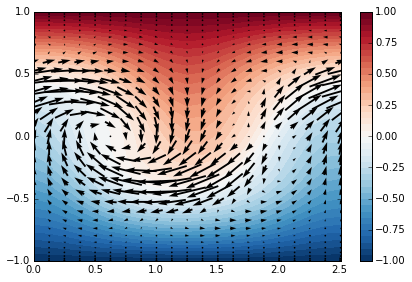

Phase-shifted Eq1 at x1, with A=0, fnorm=6.41e-05


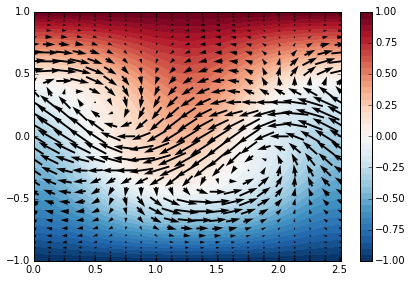

Phase-shifted Eq1 at x1, with A=0, fnorm=6.41e-05


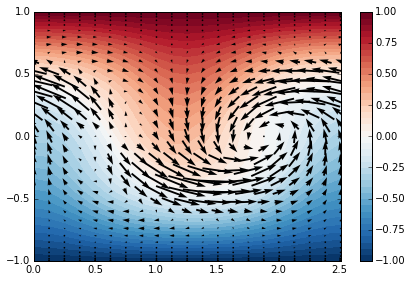

Phase-shifted Eq1 at x0, with A=0.01, fnorm=4.72e-08


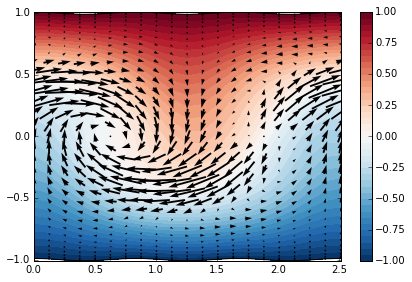

Phase-shifted Eq1 at x1, with A=0.01, fnorm=4.72e-08


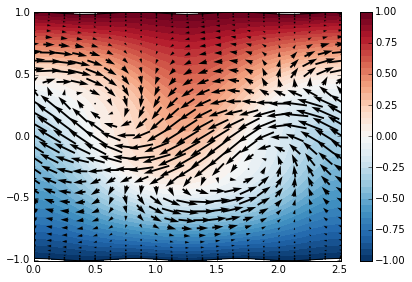

Phase-shifted Eq1 at x1, with A=0.01, fnorm=4.72e-08


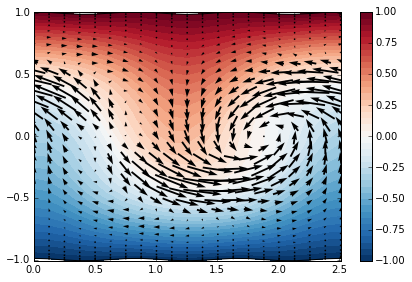

Phase-shifted Eq1 at x0, with A=0.02, fnorm=2.77e-07


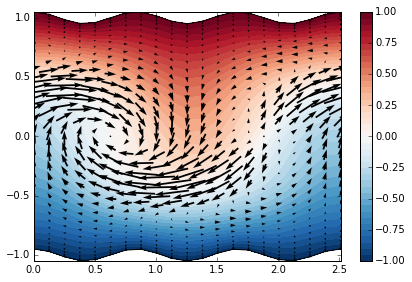

Phase-shifted Eq1 at x1, with A=0.02, fnorm=2.77e-07


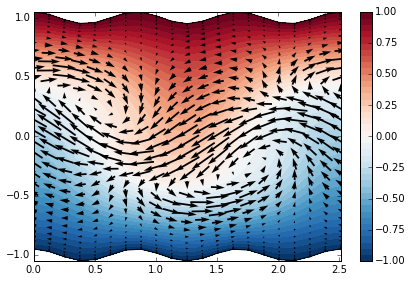

Phase-shifted Eq1 at x1, with A=0.02, fnorm=2.77e-07


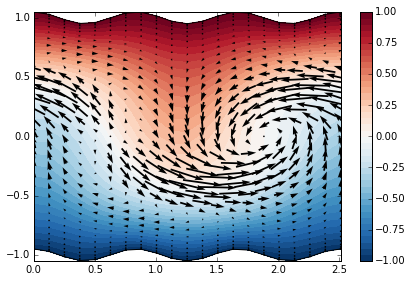

Phase-shifted Eq1 at x0, with A=0.03, fnorm=3.55e-07


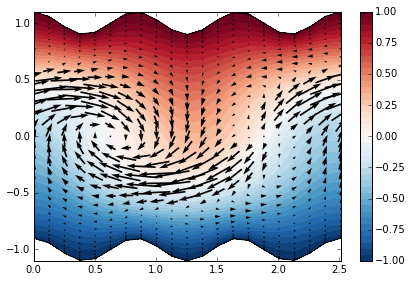

Phase-shifted Eq1 at x1, with A=0.03, fnorm=3.55e-07


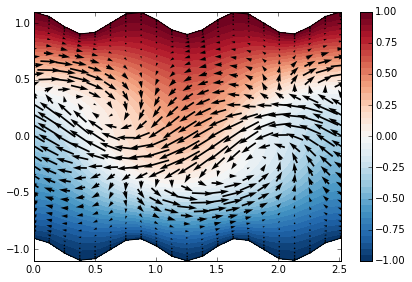

Phase-shifted Eq1 at x1, with A=0.03, fnorm=3.55e-07


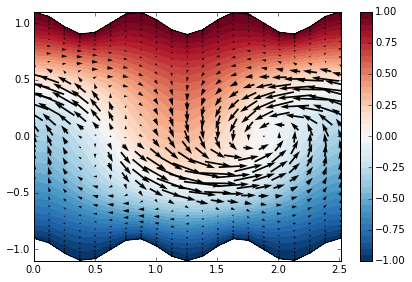

In [23]:
#%%%%%%%%%%%%%
# eps_3
#%%%%%%%%%%%%%%%%
loadPath = 'solutions/e3/'
xList = [x0]
xList.append(loadh5(loadPath+'A01/ribEq1L7M16N35E1_001E2_000E3_005.hdf5'))
xList.append(loadh5(loadPath+'A05/ribEq1L7M16N35E1_001E2_000E3_025.hdf5'))
xList.append(loadh5(loadPath+'A10/ribEq1L7M16N35E1_001E2_000E3_050.hdf5'))
fNameList = ['A00','A01','A05','A10']
for k in range(len(xList)):    
    x = xList[k]
    fName = fNameList[k]
    vf = x.slice(nd=[0,1,2])
    pf = x.getScalar(nd=3)
    fnorm = x.residuals().appendField(x.div()).norm()

    b = vf.flowDict['beta']; Lz = 2.*np.pi/b
    if k > 0:
        eps = vf.flowDict['epsArr'][3]
    else: 
        eps = 0.
    A = 2.*eps
    a = vf.flowDict['alpha']; Lx = 2.*np.pi/a
    zArr = np.arange(0., Lz*1.001,Lz/20.)
    yArr = vf.y
    xArr = np.array([0., Lx/4.,Lx/2.])

    u = vf.getScalar().getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    v = vf.getScalar(nd=1).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    w = vf.getScalar(nd=2).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))

    Y = vf.y.reshape((1,1,vf.N)) + np.zeros((xArr.size,1,1)) + A*np.cos(3.*b*zArr.reshape((1,zArr.size,1)))
    Z = zArr.reshape((1,zArr.size,1)) + np.zeros(Y.shape)
    X = xArr.reshape((xArr.size,1,1)) + np.zeros(Y.shape)
    
    fName = 'velocityE3_'+fName

    uLevels = 2.*np.arange(-0.5,0.501,0.025)
    plt.figure()
    plt.plot(Z[0,:,0], Y[0,:,0],'k')
    plt.plot(Z[0,:,-1], Y[0,:,-1],'k')
    plt.contourf(Z[0], Y[0], u[0], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
    plt.colorbar()
    plt.quiver(Z[0],Y[0], w[0],v[0],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
    print('Phase-shifted Eq1 at x0, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
    plt.tight_layout()

    #plt.savefig(figureFolder+'noLabels/'+fName+'x00.eps',format='eps')
    #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
    plt.savefig(figureFolder+fName+'x00.eps',format='eps')
    plt.show()

    plt.figure()
    plt.plot(Z[1,:,0], Y[1,:,0],'k')
    plt.plot(Z[1,:,-1], Y[1,:,-1],'k')
    plt.contourf(Z[1], Y[1], u[1], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
    plt.colorbar()
    plt.quiver(Z[1],Y[1], w[1],v[1],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
    print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
    plt.tight_layout()

    #plt.savefig(figureFolder+'noLabels/'+fName+'x25.eps',format='eps')
    #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
    plt.savefig(figureFolder+fName+'x25.eps',format='eps')
    plt.show()


    plt.figure()
    plt.plot(Z[2,:,0], Y[2,:,0],'k')
    plt.plot(Z[2,:,-1], Y[2,:,-1],'k')
    plt.contourf(Z[2], Y[2], u[2], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
    plt.colorbar()
    plt.quiver(Z[2],Y[2], w[2],v[2],units='y',width=0.015,scale=0.15,scale_units='y',pivot='middle')
    print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
    plt.tight_layout()

    #plt.savefig(figureFolder+'noLabels/'+fName+'x50.eps',format='eps')
    #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
    plt.savefig(figureFolder+fName+'x50.eps',format='eps')
    plt.show()


/usr/local/lib/python3.4/dist-packages/numpy-1.11.0-py3.4-linux-x86_64.egg/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


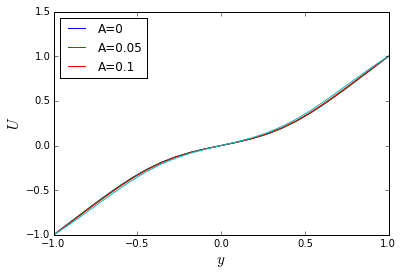

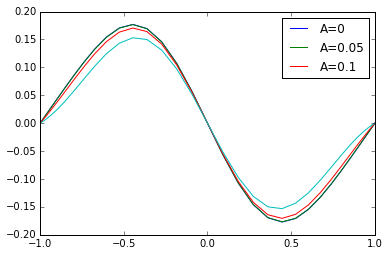

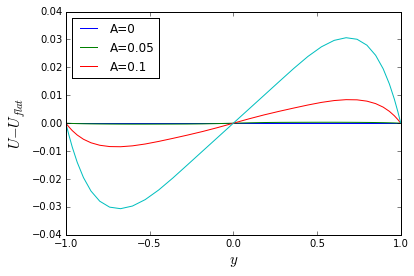

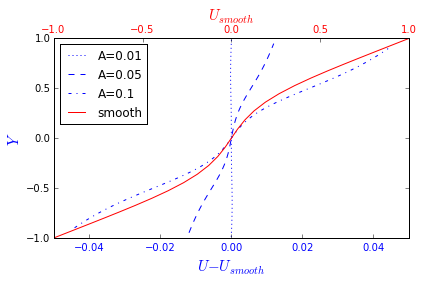

In [26]:
plt.figure()
for k in range(len(xList)):
    x = xList[k]
    plt.plot(x.y, x[0,x.nx//2,x.nz//2,0])
plt.legend(['A=0','A=0.05','A=0.1'],loc=2)
plt.xlabel('$y$',fontsize=15); plt.ylabel('$U$',fontsize=15)
plt.savefig(figureFolder+'UE3.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
for k in range(len(xList)):
    x = xList[k]
    plt.plot(x.y, x[0,x.nx//2,x.nz//2,0]-x.y)
plt.legend(['A=0','A=0.05','A=0.1'])
plt.show()

xList[0] = xList[0].slice(L=7,M=16,N=35)
x0 = xList[0]
plt.figure()
for k in range(len(xList)):
    x = xList[k]
    plt.plot(x.y, x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0])
plt.legend(['A=0','A=0.05','A=0.1'],loc=2)
plt.xlabel('$y$',fontsize=15); plt.ylabel('$U-U_{flat}$',fontsize=15)
plt.savefig(figureFolder+'U_UflatE3.eps',format='eps',dpi=1200)
plt.show()



# U_{00}
fig,ax1 = plt.subplots()
if False:
    x=xList[1]
    ln1 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b:',label='A=0.01')
    x=xList[2]
    ln2 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b--',label='A=0.05')
    x=xList[3]
    ln3 = ax1.plot(x[0,x.nx//2,x.nz//2,0]-x0[0,x.nx//2,x.nz//2,0],x.y ,'b-.',label='A=0.1')

if True:
    vArr00 = x0[0,x.nx//2, x.nz//2,0]
    x=xList[1]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln1 = ax1.plot(vArr-vArr0, yArr ,'b:',label='A=0.01')
    x=xList[2]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln2 = ax1.plot(vArr-vArr0, yArr  ,'b--',label='A=0.05')
    x=xList[3]
    yArr, vArr = rib.averagedU(x); vArr0 = chebint(vArr00, yArr)
    ln3 = ax1.plot(vArr-vArr0, yArr ,'b-.',label='A=0.1')

ax1.set_xlabel('$U-U_{smooth}$',color='b',fontsize=15)
ax1.set_ylabel('$Y$',color='b',fontsize=15)
#ax1.set_xlim([-0.01,0.14])
ax1.set_ylim([-1.,1.0])
#ax1.grid(True)

ax2 = ax1.twiny()
ln0 = ax2.plot(x0[0,x.nx//2,x.nz//2,0],x0.y ,'r',label='smooth')
ax2.set_xlim([-1.,1.])
ax2.set_ylim([-1.,1.])
ax2.set_xlabel('$U_{smooth}$',color='r',fontsize=15)

for tl in ax1.get_xticklabels():
    tl.set_color('b')
for tl in ax2.get_xticklabels():
    tl.set_color('r')

line1,label1 = ax1.get_legend_handles_labels()
line2,label2 = ax2.get_legend_handles_labels()
ax2.legend(line1+line2, label1+label2,loc=2)

plt.tight_layout()
plt.savefig(figureFolder+'U_UflatE3.eps',format='eps',dpi=1200)
plt.show()


## Projections on chi^*_0

In [6]:
def makeReal(x):
    x[0,:] = 0.5*(x + np.conj(x[0,::-1,::-1]))
    return

x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35)
makeReal(x0)
nSol = 11
corrArr = np.zeros((3,nSol))
distArr = np.zeros((3,nSol))
energyArr = np.zeros((3,nSol))
dissipationArr = np.zeros((3,nSol))

for k in range(1,nSol):
    loadPath = 'solutions/e1/'
    fName = 'A%02d/ribEq1L7M16N35E1_%03d.hdf5'%(k,5*k)
    x = loadh5(loadPath+fName)
    makeReal(x)
    corrArr[0,k] = x.dot(x0)/x.norm()/x0.norm()
    distArr[0,k] = (x-x0).norm()
    energyArr[0,k] = x.energy()
    dissipationArr[0,k] = x.dissipation()
    

for k in range(1,nSol):
    loadPath = 'solutions/e2/'
    fName = 'A%02d/ribEq1L7M16N35E1_001E2_%03d.hdf5'%(k,5*k)
    x = loadh5(loadPath+fName)
    makeReal(x)
    corrArr[1,k] = x.dot(x0)/x.norm()/x0.norm()
    distArr[1,k] = (x-x0).norm()
    energyArr[0,k] = x.energy()
    dissipationArr[0,k] = x.dissipation()
    
for k in range(1,nSol):
    loadPath = 'solutions/e3/'
    fName = 'A%02d/ribEq1L7M16N35E1_001E2_000E3_%03d.hdf5'%(k,5*k)
    x = loadh5(loadPath+fName)
    makeReal(x)
    corrArr[2,k] = x.dot(x0)/x.norm()/x0.norm()
    distArr[2,k] = (x-x0).norm()
    energyArr[0,k] = x.energy()
    dissipationArr[0,k] = x.dissipation()
    


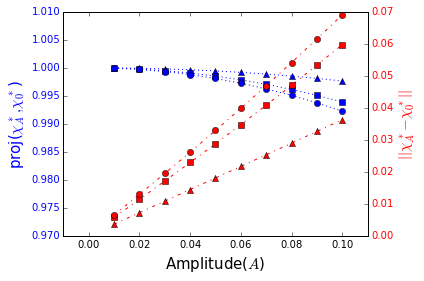

In [11]:
epsArr = np.arange(0.005,0.05001,0.005)
# correlation and distance
fig,ax1 = plt.subplots()
ln1 = ax1.plot(2.*epsArr, corrArr[0,1:],'b^:')
ln2 = ax1.plot(2.*epsArr, corrArr[1,1:],'bs:')
ln3 = ax1.plot(2.*epsArr, corrArr[2,1:],'bo:')
ax1.set_ylabel('proj($\\chi^*_A,\\chi^*_0$)',color='b',fontsize=15)
ax1.set_xlim([-0.01,0.14])
ax1.set_ylim([0.97,1.01])

ax2 = ax1.twinx()
ln21 = ax2.plot(2.*epsArr, distArr[0,1:],'r^-.')
ln22 = ax2.plot(2.*epsArr, distArr[1,1:],'rs-.')
ln23 = ax2.plot(2.*epsArr, distArr[2,1:],'ro-.')
ax2.set_xlim([-0.01,0.11])
#ax2.set_ylim([0.,0.12])
ax2.set_ylabel('$||\chi^*_A-\chi^*_0||$',color='r',fontsize=15)

for tl in ax1.get_yticklabels():
    tl.set_color('b')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

line1,label1 = ax1.get_legend_handles_labels()
line2,label2 = ax2.get_legend_handles_labels()
#ax2.legend(line1+line2, label1+label2,loc='upper center',ncol=2)

ax1.set_xlabel('Amplitude($A$)',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'corrDistE123.eps',format='eps',dpi=1200)
plt.show()



## Direction of perturbation from flat-walled solution

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


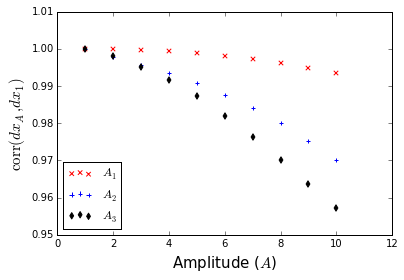

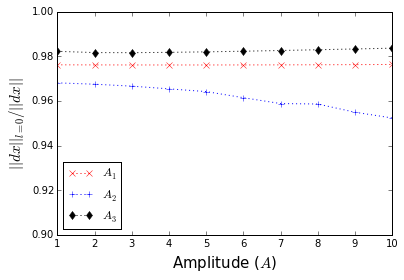

In [111]:
def makeReal(x):
    x[0,:] = 0.5*(x + np.conj(x[0,::-1,::-1]))
    return

x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35)
makeReal(x0)
nSol = 11
corrArr = np.zeros((3,nSol))
energyArr = np.zeros((3,nSol))

x1 = loadh5('solutions/e1/A01/ribEq1L7M16N35E1_005.hdf5')
makeReal(x1)
dx1 = x1 - x0
for k in range(1,nSol):
    loadPath = 'solutions/e1/'
    fName = 'A%02d/ribEq1L7M16N35E1_%03d.hdf5'%(k,5*k)
    x = loadh5(loadPath+fName)
    makeReal(x)
    dx = x-x0
    corrArr[0,k] = dx.dot(dx1)/dx.norm()/dx1.norm()
    
    # Setting l=0 modes to zero in dx
    norm0 = dx.norm()
    energyArr[0,k] = dx.slice(L=0).norm()**2/norm0**2
    
x1 = loadh5('solutions/e2/A01/ribEq1L7M16N35E1_001E2_005.hdf5')
makeReal(x1)
dx1 = x1 - x0
for k in range(1,nSol):
    loadPath = 'solutions/e2/'
    fName = 'A%02d/ribEq1L7M16N35E1_001E2_%03d.hdf5'%(k,5*k)
    x = loadh5(loadPath+fName)
    makeReal(x)
    dx = x-x0
    corrArr[1,k] = dx.dot(dx1)/dx.norm()/dx1.norm()
    
    # Energy in l=0
    norm0 = dx.norm()
    energyArr[1,k] = dx.slice(L=0).norm()**2/norm0**2
    
x1 = loadh5('solutions/e3/A01/ribEq1L7M16N35E1_001E2_000E3_005.hdf5')
makeReal(x1)
dx1 = x1 - x0
for k in range(1,nSol):
    loadPath = 'solutions/e3/'
    fName = 'A%02d/ribEq1L7M16N35E1_001E2_000E3_%03d.hdf5'%(k,5*k)
    x = loadh5(loadPath+fName)
    makeReal(x)
    dx = x-x0
    corrArr[2,k] = dx.dot(dx1)/dx.norm()/dx1.norm()
    
    # Setting l=0 modes to zero in dx
    norm0 = dx.norm()
    energyArr[2,k] = dx.slice(L=0).norm()**2/norm0**2
    
plt.figure()
plt.scatter(np.arange(1,nSol),np.real(corrArr[0,1:]),c='r',marker='x')
plt.scatter(np.arange(1,nSol),np.real(corrArr[1,1:]),c='b',marker='+')
plt.scatter(np.arange(1,nSol),np.real(corrArr[2,1:]),c='k',marker='d')
plt.ylim([0.95, 1.01])
plt.legend(['$A_1$','$A_2$','$A_3$'],loc=3)
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('$\\mathrm{corr}(dx_A, dx_1)$',fontsize=15)
plt.savefig(figureFolder+'pertCorr.eps',format='eps',dpi=1200)
plt.show()


plt.figure()
plt.plot(np.arange(1,nSol),np.real(energyArr[0,1:]),'rx:')
plt.plot(np.arange(1,nSol),np.real(energyArr[1,1:]),'b+:')
plt.plot(np.arange(1,nSol),np.real(energyArr[2,1:]),'kd:')
plt.ylim([0.9, 1.0])
plt.legend(['$A_1$','$A_2$','$A_3$'],loc=3)
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('$||dx||_{l=0}/||dx||$',fontsize=15)
plt.savefig(figureFolder+'pertEnergyL0.eps',format='eps',dpi=1200)
plt.show()


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


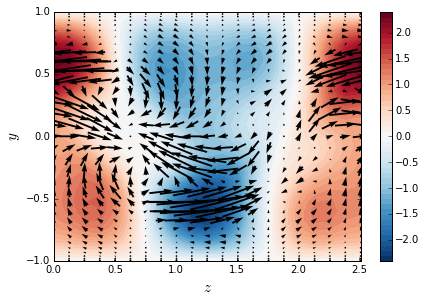

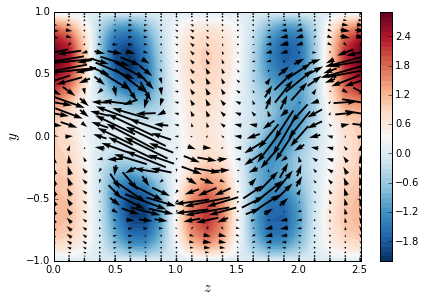

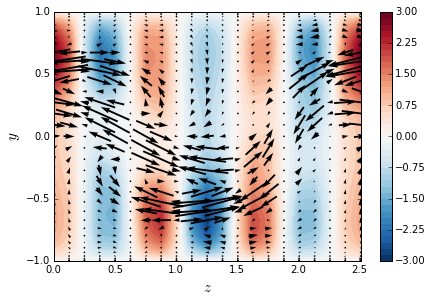

In [90]:
#%%%%%%%%%%%%%
# eps_3
#%%%%%%%%%%%%%%%%
loadPath = 'solutions/'
x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35); makeReal(x0)
dxList = []
x=loadh5(loadPath+'e1/A01/ribEq1L7M16N35E1_005.hdf5');makeReal(x)
dxList.append(x-x0)
x=loadh5(loadPath+'e2/A01/ribEq1L7M16N35E1_001E2_005.hdf5');makeReal(x)
dxList.append(x-x0)
x=loadh5(loadPath+'e3/A01/ribEq1L7M16N35E1_001E2_000E3_005.hdf5');makeReal(x)
dxList.append(x-x0)
fNameList = ['E1','E2','E3']
for k in range(len(dxList)):    
    x = dxList[k]
    x = x/x.slice(nd=[0,1,2]).norm()
    fName = fNameList[k]
    vf = x.slice(nd=[0,1,2])
    pf = x.getScalar(nd=3)
    fnorm = x.residuals().appendField(x.div()).norm()

    b = vf.flowDict['beta']; Lz = 2.*np.pi/b
    if k > 0:
        eps = vf.flowDict['epsArr'][k]
    else: 
        eps = 0.
    #A = 2.*eps
    A = 0.
    a = vf.flowDict['alpha']; Lx = 2.*np.pi/a
    zArr = np.arange(0., Lz*1.001,Lz/20.)
    yArr = vf.y
    xArr = np.array([0., Lx/4.,Lx/2.])

    u = vf.getScalar().getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    v = vf.getScalar(nd=1).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    w = vf.getScalar(nd=2).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))

    Y = vf.y.reshape((1,1,vf.N)) + np.zeros((xArr.size,1,1)) + A*np.cos(3.*b*zArr.reshape((1,zArr.size,1)))
    Z = zArr.reshape((1,zArr.size,1)) + np.zeros(Y.shape)
    X = xArr.reshape((xArr.size,1,1)) + np.zeros(Y.shape)
    
    fName = 'pertA01_'+fName

    #uLevels = 2.*np.arange(-0.5,0.501,0.025)
    plt.figure()
    plt.plot(Z[0,:,0], Y[0,:,0],'k')
    plt.plot(Z[0,:,-1], Y[0,:,-1],'k')
    #plt.contourf(Z[0], Y[0], u[0], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
    plt.contourf(Z[0], Y[0], u[0], 50,cmap=plt.get_cmap('RdBu_r'))
    plt.colorbar()
    plt.quiver(Z[0],Y[0], w[0],v[0],units='y',width=0.015,scale=0.75,scale_units='y',pivot='middle')
    #print('Phase-shifted Eq1 at x0, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
    plt.tight_layout()

    #plt.savefig(figureFolder+'noLabels/'+fName+'x00.eps',format='eps')
    plt.xlabel('$z$',fontsize=15); plt.ylabel('$y$',fontsize=15)
    plt.savefig(figureFolder+fName+'x00.eps',format='eps')
    plt.show()



# Extrapolation from A=0.01

In [89]:
x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35)
x1 = loadh5('solutions/e1/A01/ribEq1L7M16N35E1_005.hdf5')
dx = (x1 - x0)/0.01

epsArr = np.arange(0.,0.1001,0.005)
normArr = np.zeros((2,epsArr.size))
divArr = np.zeros((2,epsArr.size))
corrArr = np.zeros((2,epsArr.size))
energyArr = np.zeros((3,epsArr.size))
dissipationArr = np.zeros((3,epsArr.size))

for k in range(1,epsArr.size):
    eps = epsArr[k]
    x = x0 + 2.*eps*dx
    x.flowDict['eps'] = eps
    x.flowDict['epsArr'] = np.array([0.,eps])
    fileStr = 'solutions/e1/A%02d/ribEq1L7M16N35E1_%03d.hdf5'%(k,5*k)
    xSol = loadh5(fileStr)
    
    divArr[0,k] = x.div().norm()
    normArr[0,k] = x.residuals().norm()
    
    corrArr[0,k] = x.dot(xSol)/x.norm()/xSol.norm()
    corrArr[1,k] = x0.dot(xSol)/x0.norm()/xSol.norm()
    
    energyArr[0,k] = x.energy()
    energyArr[1,k] = xSol.energy()
    
    dissipationArr[0,k] = x.dissipation()
    dissipationArr[1,k] = xSol.dissipation()
    
    x[:] = x0[:]
    divArr[1,k] = x.div().norm()
    normArr[1,k] = x.residuals().norm()
    energyArr[2,k] = x.energy()
    dissipationArr[2,k] = x.dissipation()
    



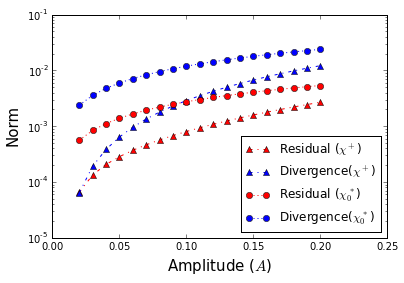

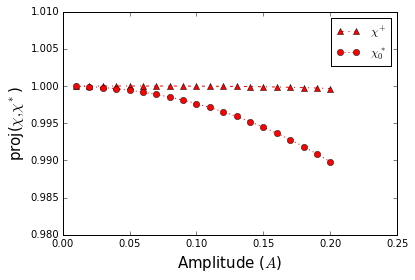

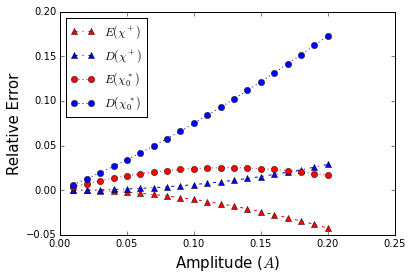

In [90]:
fName='E1'
plt.figure()
plt.plot(2.*epsArr[2:],normArr[0,2:],'r^-.')
plt.plot(2.*epsArr[2:],divArr[0,2:],'b^-.')
plt.plot(2.*epsArr[2:],normArr[1,2:],'ro:')
plt.plot(2.*epsArr[2:],divArr[1,2:],'bo:')
plt.yscale('log')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('Norm',fontsize=15)
plt.legend(['Residual ($\\chi^+$)','Divergence($\\chi^+$)','Residual ($\\chi^*_0$)','Divergence($\\chi^*_0$)'],loc=4)
plt.savefig(figureFolder+'linExNorm'+fName+'.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr[1:],corrArr[0,1:],'r^-.')
plt.plot(2.*epsArr[1:],corrArr[1,1:],'ro:')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('proj($ \chi, \chi^*$)',fontsize=15)
plt.legend(['$\\chi^+$','$\\chi^*_0$'])
plt.ylim([0.98,1.01])
plt.savefig(figureFolder+'linExCorr'+fName+'.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr[1:],(energyArr[0,1:] - energyArr[1,1:])/energyArr[1,1:],'r^-.')
plt.plot(2.*epsArr[1:],(dissipationArr[0,1:] - dissipationArr[1,1:])/dissipationArr[1,1:],'b^-.')
plt.plot(2.*epsArr[1:],(energyArr[2,1:] - energyArr[1,1:])/energyArr[1,1:],'ro:')
plt.plot(2.*epsArr[1:],(dissipationArr[2,1:] - dissipationArr[1,1:])/dissipationArr[1,1:],'bo:')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('Relative Error',fontsize=15)
plt.legend(['$E(\\chi^+)$','$D(\\chi^+)$','$E(\\chi^*_0)$','$D(\\chi^*_0)$'],loc=2)
plt.savefig(figureFolder+'linExErr'+fName+'.eps',format='eps',dpi=1200)
plt.show()




In [91]:
x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35)
x1 = loadh5('solutions/e3/A01/ribEq1L7M16N35E1_001E2_000E3_005.hdf5')
dx = (x1 - x0)/0.01

epsArr = np.arange(0.,0.0501,0.005)
normArr = np.zeros((2,epsArr.size))
divArr = np.zeros((2,epsArr.size))
corrArr = np.zeros((2,epsArr.size))
energyArr = np.zeros((3,epsArr.size))
dissipationArr = np.zeros((3,epsArr.size))

for k in range(1,epsArr.size):
    eps = epsArr[k]
    x = x0 + 2.*eps*dx
    x.flowDict['eps'] = 0.001
    x.flowDict['epsArr'] = np.array([0.,0.001,0.,eps])
    fileStr = 'solutions/e3/A%02d/ribEq1L7M16N35E1_001E2_000E3_%03d.hdf5'%(k,5*k)
    xSol = loadh5(fileStr)
    
    divArr[0,k] = x.div().norm()
    normArr[0,k] = x.residuals().norm()
    
    corrArr[0,k] = x.dot(xSol)/x.norm()/xSol.norm()
    corrArr[1,k] = x0.dot(xSol)/x0.norm()/xSol.norm()
    
    energyArr[0,k] = x.energy()
    energyArr[1,k] = xSol.energy()
    
    dissipationArr[0,k] = x.dissipation()
    dissipationArr[1,k] = xSol.dissipation()
    
    x[:] = x0[:]
    divArr[1,k] = x.div().norm()
    normArr[1,k] = x.residuals().norm()
    energyArr[2,k] = x.energy()
    dissipationArr[2,k] = x.dissipation()
    



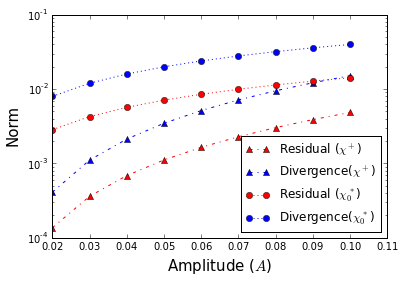

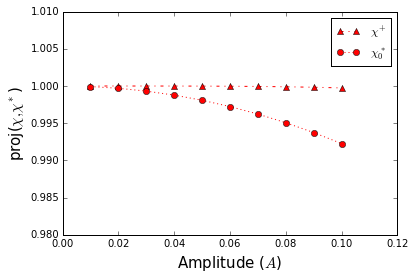

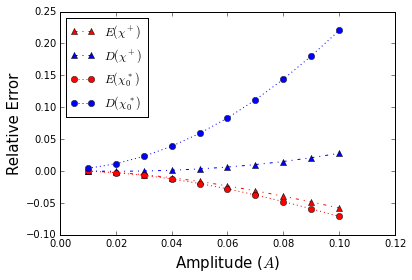

In [92]:
fName='E3'
plt.figure()
plt.plot(2.*epsArr[2:],normArr[0,2:],'r^-.')
plt.plot(2.*epsArr[2:],divArr[0,2:],'b^-.')
plt.plot(2.*epsArr[2:],normArr[1,2:],'ro:')
plt.plot(2.*epsArr[2:],divArr[1,2:],'bo:')
plt.yscale('log')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('Norm',fontsize=15)
plt.legend(['Residual ($\\chi^+$)','Divergence($\\chi^+$)','Residual ($\\chi^*_0$)','Divergence($\\chi^*_0$)'],loc=4)
plt.savefig(figureFolder+'linExNorm'+fName+'.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr[1:],corrArr[0,1:],'r^-.')
plt.plot(2.*epsArr[1:],corrArr[1,1:],'ro:')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('proj($ \chi, \chi^*$)',fontsize=15)
plt.legend(['$\\chi^+$','$\\chi^*_0$'])
plt.ylim([0.98,1.01])
plt.savefig(figureFolder+'linExCorr'+fName+'.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr[1:],(energyArr[0,1:] - energyArr[1,1:])/energyArr[1,1:],'r^-.')
plt.plot(2.*epsArr[1:],(dissipationArr[0,1:] - dissipationArr[1,1:])/dissipationArr[1,1:],'b^-.')
plt.plot(2.*epsArr[1:],(energyArr[2,1:] - energyArr[1,1:])/energyArr[1,1:],'ro:')
plt.plot(2.*epsArr[1:],(dissipationArr[2,1:] - dissipationArr[1,1:])/dissipationArr[1,1:],'bo:')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('Relative Error',fontsize=15)
plt.legend(['$E(\\chi^+)$','$D(\\chi^+)$','$E(\\chi^*_0)$','$D(\\chi^*_0)$'],loc=2)
plt.savefig(figureFolder+'linExErr'+fName+'.eps',format='eps',dpi=1200)
plt.show()






In [93]:
x0 = loadh5('ribEq1L7M10N30E0000.hdf5').slice(L=7,M=16,N=35)
x1 = loadh5('solutions/e2/A01/ribEq1L7M16N35E1_001E2_005.hdf5')
dx = (x1 - x0)/0.01

epsArr = np.arange(0.,0.0501,0.005)
normArr = np.zeros((2,epsArr.size))
divArr = np.zeros((2,epsArr.size))
corrArr = np.zeros((2,epsArr.size))
energyArr = np.zeros((3,epsArr.size))
dissipationArr = np.zeros((3,epsArr.size))

for k in range(1,epsArr.size):
    eps = epsArr[k]
    x = x0 + 2.*eps*dx
    x.flowDict['eps'] = 0.001
    x.flowDict['epsArr'] = np.array([0.,0.001,eps])
    fileStr = 'solutions/e2/A%02d/ribEq1L7M16N35E1_001E2_%03d.hdf5'%(k,5*k)
    xSol = loadh5(fileStr)
    
    divArr[0,k] = x.div().norm()
    normArr[0,k] = x.residuals().norm()
    
    corrArr[0,k] = x.dot(xSol)/x.norm()/xSol.norm()
    corrArr[1,k] = x0.dot(xSol)/x0.norm()/xSol.norm()
    
    energyArr[0,k] = x.energy()
    energyArr[1,k] = xSol.energy()
    
    dissipationArr[0,k] = x.dissipation()
    dissipationArr[1,k] = xSol.dissipation()
    
    x[:] = x0[:]
    divArr[1,k] = x.div().norm()
    normArr[1,k] = x.residuals().norm()
    energyArr[2,k] = x.energy()
    dissipationArr[2,k] = x.dissipation()
    



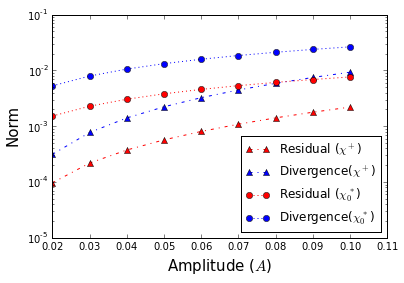

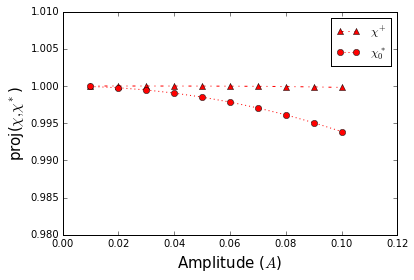

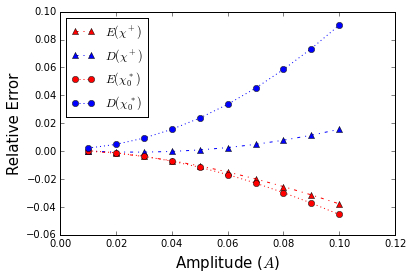

In [94]:
fName='E2'
plt.figure()
plt.plot(2.*epsArr[2:],normArr[0,2:],'r^-.')
plt.plot(2.*epsArr[2:],divArr[0,2:],'b^-.')
plt.plot(2.*epsArr[2:],normArr[1,2:],'ro:')
plt.plot(2.*epsArr[2:],divArr[1,2:],'bo:')
plt.yscale('log')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('Norm',fontsize=15)
plt.legend(['Residual ($\\chi^+$)','Divergence($\\chi^+$)','Residual ($\\chi^*_0$)','Divergence($\\chi^*_0$)'],loc=4)
plt.savefig(figureFolder+'linExNorm'+fName+'.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr[1:],corrArr[0,1:],'r^-.')
plt.plot(2.*epsArr[1:],corrArr[1,1:],'ro:')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('proj($ \chi, \chi^*$)',fontsize=15)
plt.legend(['$\\chi^+$','$\\chi^*_0$'])
plt.ylim([0.98,1.01])
plt.savefig(figureFolder+'linExCorr'+fName+'.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr[1:],(energyArr[0,1:] - energyArr[1,1:])/energyArr[1,1:],'r^-.')
plt.plot(2.*epsArr[1:],(dissipationArr[0,1:] - dissipationArr[1,1:])/dissipationArr[1,1:],'b^-.')
plt.plot(2.*epsArr[1:],(energyArr[2,1:] - energyArr[1,1:])/energyArr[1,1:],'ro:')
plt.plot(2.*epsArr[1:],(dissipationArr[2,1:] - dissipationArr[1,1:])/dissipationArr[1,1:],'bo:')
plt.xlabel('Amplitude ($A$)',fontsize=15)
plt.ylabel('Relative Error',fontsize=15)
plt.legend(['$E(\\chi^+)$','$D(\\chi^+)$','$E(\\chi^*_0)$','$D(\\chi^*_0)$'],loc=2)
plt.savefig(figureFolder+'linExErr'+fName+'.eps',format='eps',dpi=1200)
plt.show()





# E and D for EQ2

In [36]:
energyArr = np.zeros((3,11))         # Laminar, EQ1, EQ2
dissipationArr = np.zeros((3,11))

xeq1 = loadh5('ribEq1L7M10N30E0000.hdf5')
xeq2 = loadh5('ribEq2L7M16N35E1_000.hdf5')
xLam = xeq1.zero(); xLam[0,xLam.nx//2, xLam.nz//2,0] = xLam.y
energyArr[0,0] = xLam.energy(); dissipationArr[0,0] = xLam.dissipation()
energyArr[1,0] = xeq1.energy(); dissipationArr[1,0] = xeq1.dissipation()
energyArr[2,0] = xeq2.energy(); dissipationArr[2,0] = xeq2.dissipation() 
for k in range(1,11):
    xeq1 = loadh5('solutions/e1/A%02d/ribEq1L7M16N35E1_%03d.hdf5'%(k,5*k))
    xeq2 = loadh5('solutions/e1u/A%02d/ribEq2L7M16N35E1_%03d.hdf5'%(k,5*k))
    xLam = loadh5('solutions/laminar/lamL0M7N35E1_%03d.hdf5'%(5*k))
    energyArr[0,k] = xLam.energy(); dissipationArr[0,k] = xLam.dissipation()
    energyArr[1,k] = xeq1.energy(); dissipationArr[1,k] = xeq1.dissipation()
    energyArr[2,k] = xeq2.energy(); dissipationArr[2,k] = xeq2.dissipation() 
    

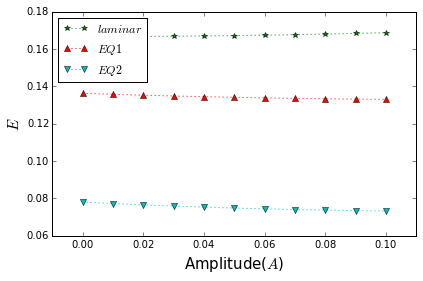

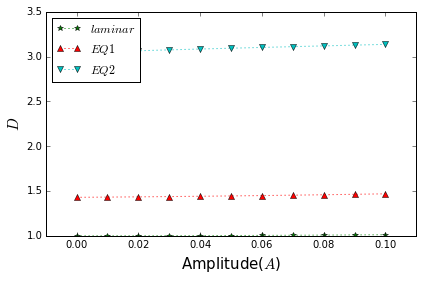

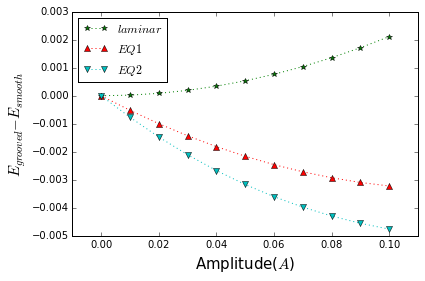

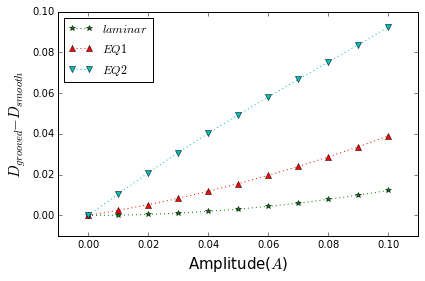

In [47]:
# Residual norm, accuracy, and distance
epsArr = np.arange(0.,0.0501,0.005)
# Energy density and bulk dissipation rate
plt.figure()
plt.plot(2.*epsArr, energyArr[0],'g*:',label='$laminar$')
plt.plot(2.*epsArr, energyArr[1],'r^:',label='$EQ1$')
plt.plot(2.*epsArr, energyArr[2],'cv:',label='$EQ2$')
plt.xlim([-0.01,0.11])
#plt.ylim([0.13,0.15])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('$E$',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'energyLamLowUp.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr, dissipationArr[0],'g*:',label='$laminar$')
plt.plot(2.*epsArr, dissipationArr[1],'r^:',label='$EQ1$')
plt.plot(2.*epsArr, dissipationArr[2],'cv:',label='$EQ2$')
plt.xlim([-0.01,0.11])
#plt.ylim([-0.01,0.1])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('$D$',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'dissipationLamLowUp.eps',format='eps',dpi=1200)
plt.show()

# Energy density and bulk dissipation rate
plt.figure()
plt.plot(2.*epsArr, energyArr[0]-energyArr[0,0],'g*:',label='$laminar$')
plt.plot(2.*epsArr, energyArr[1]-energyArr[1,0],'r^:',label='$EQ1$')
plt.plot(2.*epsArr, energyArr[2]-energyArr[2,0],'cv:',label='$EQ2$')
plt.xlim([-0.01,0.11])
#plt.ylim([0.13,0.15])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('$E_{grooved}-E_{smooth}$',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'energyDiffLamLowUp.eps',format='eps',dpi=1200)
plt.show()

plt.figure()
plt.plot(2.*epsArr, dissipationArr[0]-dissipationArr[0,0],'g*:',label='$laminar$')
plt.plot(2.*epsArr, dissipationArr[1]-dissipationArr[1,0],'r^:',label='$EQ1$')
plt.plot(2.*epsArr, dissipationArr[2]-dissipationArr[2,0],'cv:',label='$EQ2$')
plt.xlim([-0.01,0.11])
plt.ylim([-0.01,0.1])
plt.legend(loc=2)
plt.xlabel('Amplitude($A$)',fontsize=15); plt.ylabel('$D_{grooved}-D_{smooth}$',fontsize=15)
plt.tight_layout()
plt.savefig(figureFolder+'dissipationDiffLamLowUp.eps',format='eps',dpi=1200)
plt.show()


# EQ2 velocity contours

Phase-shifted Eq1 at x0, with A=0, fnorm=0.000827


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


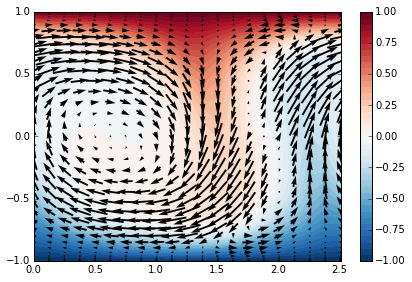

Phase-shifted Eq1 at x1, with A=0, fnorm=0.000827


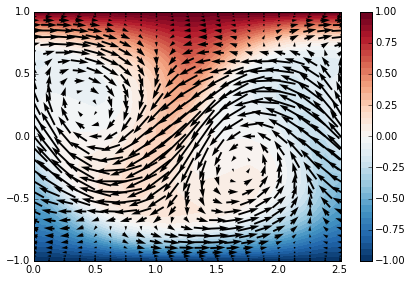

Phase-shifted Eq1 at x1, with A=0, fnorm=0.000827


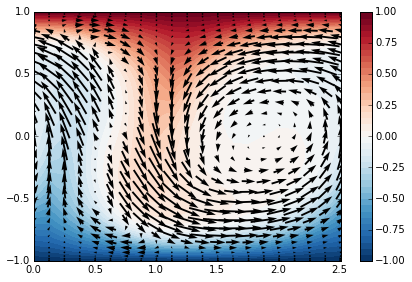

Phase-shifted Eq1 at x0, with A=0.01, fnorm=1.31e-05


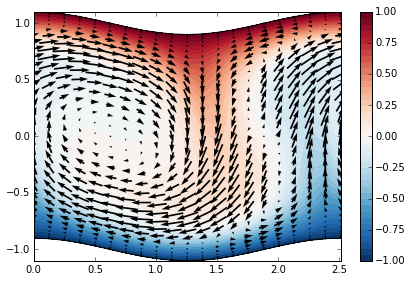

Phase-shifted Eq1 at x1, with A=0.01, fnorm=1.31e-05


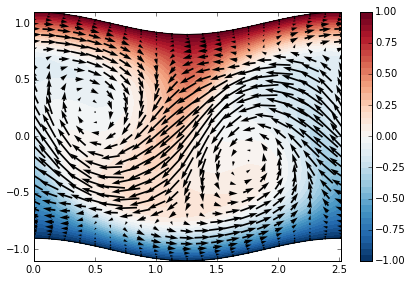

Phase-shifted Eq1 at x1, with A=0.01, fnorm=1.31e-05


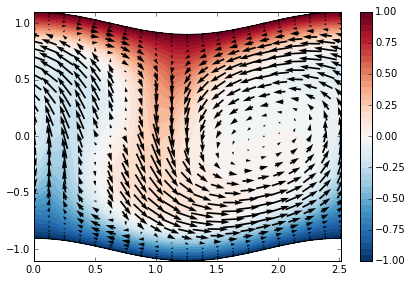

In [24]:
x0 = loadh5('ribEq2L7M16N35E1_000.hdf5')
xList = [x0]
xList.append(loadh5('solutions/e1u/A10/tmp/ribEq1_6_L7M16N35E1_050.hdf5'))
fNameList = ['A00','A10']
for k in range(len(xList)):    
    x = xList[k]
    fName = fNameList[k]
    vf = x.slice(nd=[0,1,2])
    pf = x.getScalar(nd=3)
    fnorm = x.residuals().appendField(x.div()).norm()

    b = vf.flowDict['beta']; Lz = 2.*np.pi/b; eps = vf.flowDict['eps']; A = 2.*eps
    a = vf.flowDict['alpha']; Lx = 2.*np.pi/a
    zArr = np.arange(0., Lz*1.001,Lz/20.)
    yArr = vf.y
    xArr = np.array([0., Lx/4.,Lx/2.])

    u = vf.getScalar().getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    v = vf.getScalar(nd=1).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))
    w = vf.getScalar(nd=2).getPhysical(xLoc=xArr,zLoc = zArr).reshape((xArr.size, zArr.size,vf.N))

    Y = vf.y.reshape((1,1,vf.N)) + np.zeros((xArr.size,1,1)) + A*np.cos(b*zArr.reshape((1,zArr.size,1)))
    Z = zArr.reshape((1,zArr.size,1)) + np.zeros(Y.shape)
    X = xArr.reshape((xArr.size,1,1)) + np.zeros(Y.shape)
    
    fName = 'velocityEQ2E1_'+fName
    
    if True:
        uLevels = 2.*np.arange(-0.5,0.501,0.025)
        plt.figure()
        plt.plot(Z[0,:,0], Y[0,:,0],'k')
        plt.plot(Z[0,:,-1], Y[0,:,-1],'k')
        plt.contourf(Z[0], Y[0], u[0], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
        plt.colorbar()
        plt.quiver(Z[0],Y[0], w[0],v[0],units='y',width=0.015,scale=0.5,scale_units='y',pivot='middle')
        print('Phase-shifted Eq1 at x0, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
        plt.tight_layout()

        #plt.savefig(figureFolder+'noLabels/'+fName+'x00.eps',format='eps')
        #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
        plt.savefig(figureFolder+fName+'x00.eps',format='eps')
        plt.show()

        plt.figure()
        plt.plot(Z[1,:,0], Y[1,:,0],'k')
        plt.plot(Z[1,:,-1], Y[1,:,-1],'k')
        plt.contourf(Z[1], Y[1], u[1], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
        plt.colorbar()
        plt.quiver(Z[1],Y[1], w[1],v[1],units='y',width=0.015,scale=0.5,scale_units='y',pivot='middle')
        print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
        plt.tight_layout()

        #plt.savefig(figureFolder+'noLabels/'+fName+'x25.eps',format='eps')
        #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
        plt.savefig(figureFolder+fName+'x25.eps',format='eps')
        plt.show()


        plt.figure()
        plt.plot(Z[2,:,0], Y[2,:,0],'k')
        plt.plot(Z[2,:,-1], Y[2,:,-1],'k')
        plt.contourf(Z[2], Y[2], u[2], cmap=plt.get_cmap('RdBu_r'),levels = uLevels)
        plt.colorbar()
        plt.quiver(Z[2],Y[2], w[2],v[2],units='y',width=0.015,scale=0.5,scale_units='y',pivot='middle')
        print('Phase-shifted Eq1 at x1, with A=%.2g, fnorm=%.3g'%(0.01*k,fnorm))
        plt.tight_layout()

        #plt.savefig(figureFolder+'noLabels/'+fName+'x50.eps',format='eps')
        #plt.xlabel('z',fontsize=15); plt.ylabel('y',fontsize=15)
        plt.savefig(figureFolder+fName+'x50.eps',format='eps')
        plt.show()


In [20]:
x0.residuals().norm(), x.residuals().norm()

(0.00082676465705938435, 0.00055649755348000964)

In [27]:
x.checkSymms(),x0.checkSymms()

({'others': 'Maybe', 'sigma1': True, 'sigma2': True, 'sigma3': True},
 {'others': 'Maybe', 'sigma1': True, 'sigma2': True, 'sigma3': True})